In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import numpy as np 
import pandas as pd
import os
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train-1542865627584.csv')
train_ben = pd.read_csv('Train_Beneficiarydata-1542865627584.csv')
train_in = pd.read_csv('Train_Inpatientdata-1542865627584.csv')
train_out = pd.read_csv('Train_Outpatientdata-1542865627584.csv')

In [3]:
train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [4]:
train_ben.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
train_in.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
train_out.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
dfs = [train, train_ben, train_in, train_out]

In [8]:
for i in dfs:
    print(i.isna().sum())

Provider          0
PotentialFraud    0
dtype: int64
BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt  

In [9]:
train_in.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40474 entries, 0 to 40473
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   BeneID                  40474 non-null  object 
 1   ClaimID                 40474 non-null  object 
 2   ClaimStartDt            40474 non-null  object 
 3   ClaimEndDt              40474 non-null  object 
 4   Provider                40474 non-null  object 
 5   InscClaimAmtReimbursed  40474 non-null  int64  
 6   AttendingPhysician      40362 non-null  object 
 7   OperatingPhysician      23830 non-null  object 
 8   OtherPhysician          4690 non-null   object 
 9   AdmissionDt             40474 non-null  object 
 10  ClmAdmitDiagnosisCode   40474 non-null  object 
 11  DeductibleAmtPaid       39575 non-null  float64
 12  DischargeDt             40474 non-null  object 
 13  DiagnosisGroupCode      40474 non-null  object 
 14  ClmDiagnosisCode_1      40474 non-null

In [10]:
for i in dfs:
  print(i.duplicated().sum())

0
0
0
0


In [11]:
def col_header_clean(df):
  df.columns=df.columns.str.lower()
  df.columns=df.columns.str.replace(' ','',regex=True)
  df.columns=df.columns.str.replace('[^\w]','_',regex=True)

for i in dfs:
    col_header_clean(i)

In [12]:
outpt=pd.merge(train_out,train,on='provider',how='left')
outpt=pd.merge(outpt,train_ben,on='beneid') #merge dfs to make an outpatient df

In [13]:
duplicate = outpt[outpt.duplicated()] #check for duplicates
duplicate

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,clmdiagnosiscode_1,...,chroniccond_depression,chroniccond_diabetes,chroniccond_ischemicheart,chroniccond_osteoporasis,chroniccond_rheumatoidarthritis,chroniccond_stroke,ipannualreimbursementamt,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt


In [14]:
print(outpt.isna().sum())
print(outpt.shape)

beneid                                  0
claimid                                 0
claimstartdt                            0
claimenddt                              0
provider                                0
inscclaimamtreimbursed                  0
attendingphysician                   1396
operatingphysician                 427120
otherphysician                     322691
clmdiagnosiscode_1                  10453
clmdiagnosiscode_2                 195380
clmdiagnosiscode_3                 314480
clmdiagnosiscode_4                 392141
clmdiagnosiscode_5                 443393
clmdiagnosiscode_6                 468981
clmdiagnosiscode_7                 484776
clmdiagnosiscode_8                 494825
clmdiagnosiscode_9                 502899
clmdiagnosiscode_10                516654
clmprocedurecode_1                 517575
clmprocedurecode_2                 517701
clmprocedurecode_3                 517733
clmprocedurecode_4                 517735
clmprocedurecode_5                

In [15]:
outpt['inpt']=0 #create a column to label data as outpatient

In [16]:
#merge dataframes to create an inpatient dataframe
inpt=pd.merge(train_in,train,on='provider',how='left')
inpt=pd.merge(inpt,train_ben,on='beneid')
print(inpt.isna().sum())
print(inpt.shape)

beneid                                 0
claimid                                0
claimstartdt                           0
claimenddt                             0
provider                               0
inscclaimamtreimbursed                 0
attendingphysician                   112
operatingphysician                 16644
otherphysician                     35784
admissiondt                            0
clmadmitdiagnosiscode                  0
deductibleamtpaid                    899
dischargedt                            0
diagnosisgroupcode                     0
clmdiagnosiscode_1                     0
clmdiagnosiscode_2                   226
clmdiagnosiscode_3                   676
clmdiagnosiscode_4                  1534
clmdiagnosiscode_5                  2894
clmdiagnosiscode_6                  4838
clmdiagnosiscode_7                  7258
clmdiagnosiscode_8                  9942
clmdiagnosiscode_9                 13497
clmdiagnosiscode_10                36547
clmprocedurecode

In [17]:
inpt['inpt']=1 #create a column to designate the data as inpatient

In [18]:
duplicate = inpt[inpt.duplicated()] #check for duplicates
duplicate

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,chroniccond_diabetes,chroniccond_ischemicheart,chroniccond_osteoporasis,chroniccond_rheumatoidarthritis,chroniccond_stroke,ipannualreimbursementamt,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt,inpt


In [19]:
#create final df merging the outpatient and inpatient dataframes
fraud=pd.merge(inpt,outpt,how='outer',left_on=['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'clmdiagnosiscode_1', 'clmdiagnosiscode_2',
       'clmdiagnosiscode_3', 'clmdiagnosiscode_4', 'clmdiagnosiscode_5',
       'clmdiagnosiscode_6', 'clmdiagnosiscode_7', 'clmdiagnosiscode_8',
       'clmdiagnosiscode_9', 'clmdiagnosiscode_10', 'clmprocedurecode_1',
       'clmprocedurecode_2', 'clmprocedurecode_3', 'clmprocedurecode_4',
       'clmprocedurecode_5', 'clmprocedurecode_6', 'deductibleamtpaid',
       'clmadmitdiagnosiscode', 'potentialfraud', 'dob', 'gender',
       'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt',
       'inpt','dod'], right_on=['beneid', 'claimid', 'claimstartdt', 'claimenddt', 'provider',
       'inscclaimamtreimbursed', 'attendingphysician', 'operatingphysician',
       'otherphysician', 'clmdiagnosiscode_1', 'clmdiagnosiscode_2',
       'clmdiagnosiscode_3', 'clmdiagnosiscode_4', 'clmdiagnosiscode_5',
       'clmdiagnosiscode_6', 'clmdiagnosiscode_7', 'clmdiagnosiscode_8',
       'clmdiagnosiscode_9', 'clmdiagnosiscode_10', 'clmprocedurecode_1',
       'clmprocedurecode_2', 'clmprocedurecode_3', 'clmprocedurecode_4',
       'clmprocedurecode_5', 'clmprocedurecode_6', 'deductibleamtpaid',
       'clmadmitdiagnosiscode', 'potentialfraud', 'dob', 'gender',
       'race', 'renaldiseaseindicator', 'state', 'county',
       'noofmonths_partacov', 'noofmonths_partbcov', 'chroniccond_alzheimer',
       'chroniccond_heartfailure', 'chroniccond_kidneydisease',
       'chroniccond_cancer', 'chroniccond_obstrpulmonary',
       'chroniccond_depression', 'chroniccond_diabetes',
       'chroniccond_ischemicheart', 'chroniccond_osteoporasis',
       'chroniccond_rheumatoidarthritis', 'chroniccond_stroke',
       'ipannualreimbursementamt', 'ipannualdeductibleamt',
       'opannualreimbursementamt', 'opannualdeductibleamt', 'inpt','dod'])

In [20]:
fraud.head()

,beneid,claimid,claimstartdt,claimenddt,provider,inscclaimamtreimbursed,attendingphysician,operatingphysician,otherphysician,admissiondt,...,chroniccond_diabetes,chroniccond_ischemicheart,chroniccond_osteoporasis,chroniccond_rheumatoidarthritis,chroniccond_stroke,ipannualreimbursementamt,ipannualdeductibleamt,opannualreimbursementamt,opannualdeductibleamt,inpt
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,1
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,1
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,1
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,1
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,1


In [21]:
#Change 2 to 0 in chronic disease categories & gender
binary=['chroniccond_alzheimer','chroniccond_heartfailure','chroniccond_kidneydisease',
        'chroniccond_cancer','chroniccond_obstrpulmonary','chroniccond_depression',
        'chroniccond_diabetes','chroniccond_ischemicheart','chroniccond_osteoporasis',
        'chroniccond_rheumatoidarthritis','chroniccond_stroke','gender']
for i in binary:
  fraud[i].replace((2),0,inplace=True)

In [22]:
#encode character variables to 0 or 1
fraud['potentialfraud'].replace(['Yes','No'],[1,0],inplace=True)
fraud['potentialfraud']=fraud['potentialfraud'].astype('int64')

fraud['renaldiseaseindicator'].replace(('Y'),1,inplace=True)

In [23]:
#convert date and time cols to dt
dates=['claimstartdt','claimenddt','dob','dod','admissiondt','dischargedt']

for i in dates:
  fraud[i]=pd.to_datetime(fraud[i], format='%Y-%m-%d')

In [24]:
#Calculate age on the first day of claim
fraud['ageatclaim']=np.floor(((fraud['claimstartdt'] - fraud['dob']).dt.days)/365.25)

#Calculate duration of claim
fraud['duration'] = ((fraud['claimenddt'] - fraud['claimstartdt']).dt.days)+1

#Calculate LOS(length of stay) of admitted patients
#fraud['los']=((fraud['dischargedt'] - fraud['admissiondt']).dt.days)+1

In [25]:
#fix the deceased column
fraud.loc[fraud.dod.isnull(),'deceased']=0
fraud.loc[fraud.dod.notnull(), 'deceased']=1

In [26]:
print(fraud.isna().sum())
print(fraud.shape)

beneid                                  0
claimid                                 0
claimstartdt                            0
claimenddt                              0
provider                                0
inscclaimamtreimbursed                  0
attendingphysician                   1508
operatingphysician                 443764
otherphysician                     358475
admissiondt                        517737
clmadmitdiagnosiscode              412312
deductibleamtpaid                     899
dischargedt                        517737
diagnosisgroupcode                 517737
clmdiagnosiscode_1                  10453
clmdiagnosiscode_2                 195606
clmdiagnosiscode_3                 315156
clmdiagnosiscode_4                 393675
clmdiagnosiscode_5                 446287
clmdiagnosiscode_6                 473819
clmdiagnosiscode_7                 492034
clmdiagnosiscode_8                 504767
clmdiagnosiscode_9                 516396
clmdiagnosiscode_10               

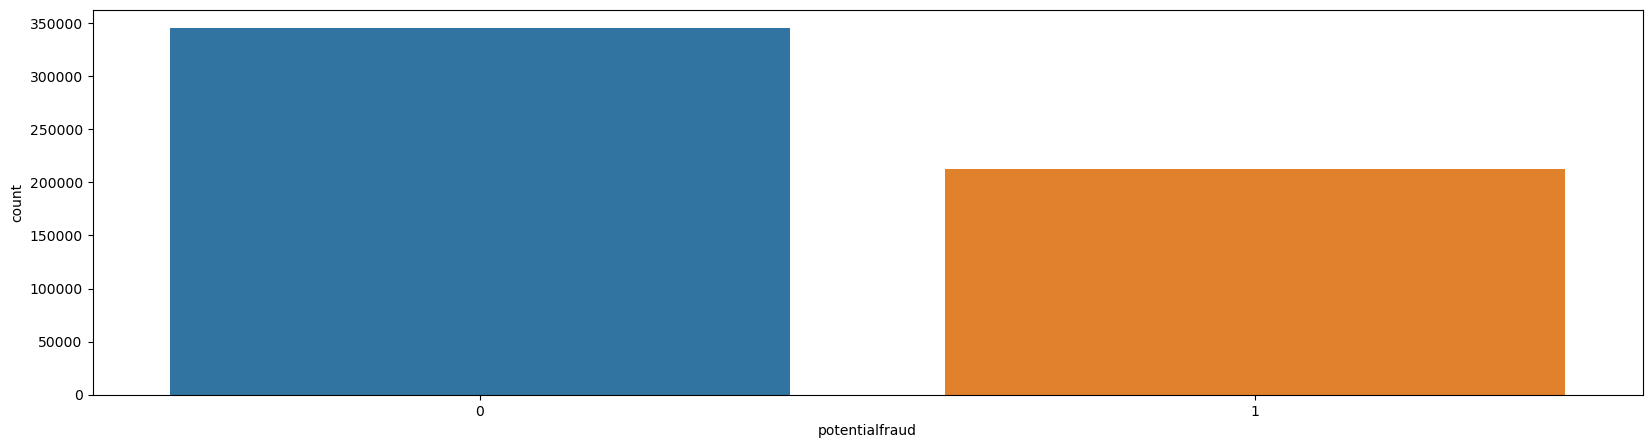

In [27]:
#get a count of the potetial fraud
plt.figure(figsize = (20,5))
sns.countplot(x = 'potentialfraud', data = fraud)
plt.show()
#non fraud cases outweigh fraud cases

Text(0.5, 1.0, 'Features Correlating with Potential Fraud')

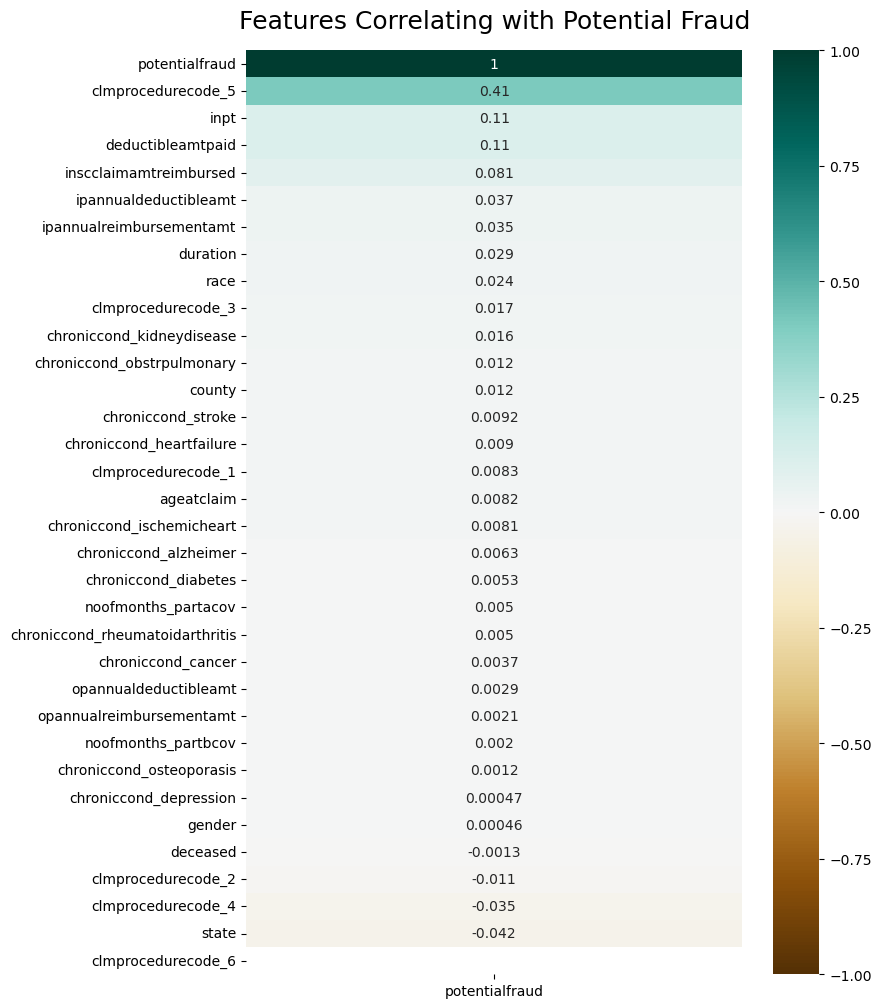

In [28]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(fraud.corr()[['potentialfraud']].sort_values(by='potentialfraud', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Potential Fraud', fontdict={'fontsize':18}, pad=16)

In [29]:
#drop columns that are either unnecessary for modeling or have excess NaN values
fraud=fraud.drop(['beneid','claimid','dod','noofmonths_partacov','noofmonths_partbcov', 
                  'operatingphysician','otherphysician','attendingphysician',
                  'admissiondt','dischargedt','claimstartdt','claimenddt',
                  'clmadmitdiagnosiscode','diagnosisgroupcode','clmdiagnosiscode_1',
                  'clmdiagnosiscode_2', 'clmdiagnosiscode_3','clmdiagnosiscode_4','dob',
                  'clmdiagnosiscode_5', 'clmdiagnosiscode_6','clmdiagnosiscode_7',
                  'clmdiagnosiscode_8', 'clmdiagnosiscode_9','clmdiagnosiscode_10',
                  'clmprocedurecode_1', 'clmprocedurecode_2','clmprocedurecode_3',
                  'clmprocedurecode_4', 'clmprocedurecode_5','clmprocedurecode_6','provider'],axis=1)

In [30]:
mean_value=fraud['deductibleamtpaid'].mean()

In [31]:
fraud['deductibleamtpaid'].fillna(value=mean_value, inplace=True)

In [32]:
y=fraud['potentialfraud']
X=fraud.drop('potentialfraud',axis=1)

In [33]:
#split the data into a train and test set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=54321, stratify=y)

In [34]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

In [35]:
X.dtypes

inscclaimamtreimbursed               int64
deductibleamtpaid                  float64
gender                               int64
race                                 int64
renaldiseaseindicator               object
state                                int64
county                               int64
chroniccond_alzheimer                int64
chroniccond_heartfailure             int64
chroniccond_kidneydisease            int64
chroniccond_cancer                   int64
chroniccond_obstrpulmonary           int64
chroniccond_depression               int64
chroniccond_diabetes                 int64
chroniccond_ischemicheart            int64
chroniccond_osteoporasis             int64
chroniccond_rheumatoidarthritis      int64
chroniccond_stroke                   int64
ipannualreimbursementamt             int64
ipannualdeductibleamt                int64
opannualreimbursementamt             int64
opannualdeductibleamt                int64
inpt                                 int64
ageatclaim 

In [36]:
#use SMOTE to correct for underrepresentation of target variable
sm = SMOTE(random_state=42)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print("Shape before SMOTE: ", X_train.shape, y_train.shape, "\n")
print("Shape after SMOTE: ", X_train_SMOTE.shape, y_train_SMOTE.shape, "\n")

Shape before SMOTE:  (418658, 26) (418658,) 

Shape after SMOTE:  (518122, 26) (518122,) 



In [37]:
stdsc = StandardScaler()  
X_train_SMOTE_std = stdsc.fit_transform(X_train_SMOTE)
X_val_std = stdsc.transform(X_val)

In [38]:
#use RFE to find the 10 best features for modeling
#from sklearn.ensemble import RandomForestClassifier
#rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=10)
#_ = rfe.fit(X_train_SMOTE_std,y_train_SMOTE)
#print('Important Features\n',X.columns[rfe.support_])

#commented this portion out to save time when rerunning the program

In [39]:
X = X[['inscclaimamtreimbursed', 'deductibleamtpaid', 'race',
       'renaldiseaseindicator', 'ipannualreimbursementamt',
       'ipannualdeductibleamt', 'opannualreimbursementamt',
       'opannualdeductibleamt', 'ageatclaim', 'duration']]
X['renaldiseaseindicator'].astype(str).astype(int)

0         0
1         0
2         0
3         0
4         1
         ..
558206    0
558207    0
558208    0
558209    0
558210    0
Name: renaldiseaseindicator, Length: 558211, dtype: int32

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=54321, stratify=y)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)
X_train_SMOTE_std = pd.DataFrame(stdsc.fit_transform(X_train_SMOTE), columns=X_train_SMOTE.columns)
X_val_std = pd.DataFrame(stdsc.transform(X_val), columns=X_val.columns)

In [41]:
#train Logistic Regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_SMOTE_std, y_train_SMOTE)

LogisticRegression()

In [42]:
y_pred_lr = logreg.predict(X_val_std)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_val_std, y_val)))

Accuracy of logistic regression classifier on test set: 0.62


Classification Report for Logistic Regression Model 
               precision    recall  f1-score   support

           0       0.63      0.92      0.75     86354
           1       0.52      0.14      0.22     53199

    accuracy                           0.62    139553
   macro avg       0.58      0.53      0.49    139553
weighted avg       0.59      0.62      0.55    139553



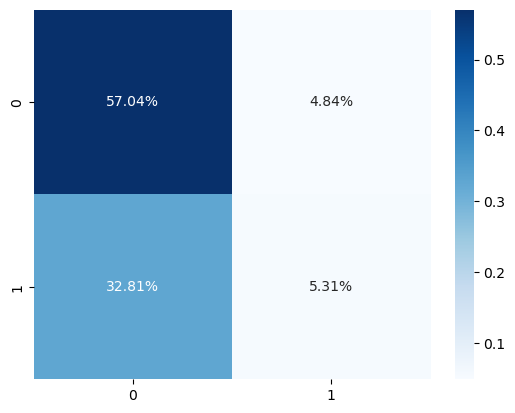

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cf_matrix = confusion_matrix(y_val,y_pred_lr)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print('Classification Report for Logistic Regression Model \n', classification_report(y_val,y_pred_lr))

In [44]:
#train Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_SMOTE_std, y_train_SMOTE)
y_pred_dt = clf.predict(X_val_std)
print('Accuracy of Decision Tree Classifier on test set: {:.2f}'.format(clf.score(X_val_std, y_val)))

Accuracy of Decision Tree Classifier on test set: 0.58


Classification Report for Decision Tree Classifier Model 
               precision    recall  f1-score   support

           0       0.66      0.66      0.66     86354
           1       0.45      0.46      0.45     53199

    accuracy                           0.58    139553
   macro avg       0.56      0.56      0.56    139553
weighted avg       0.58      0.58      0.58    139553



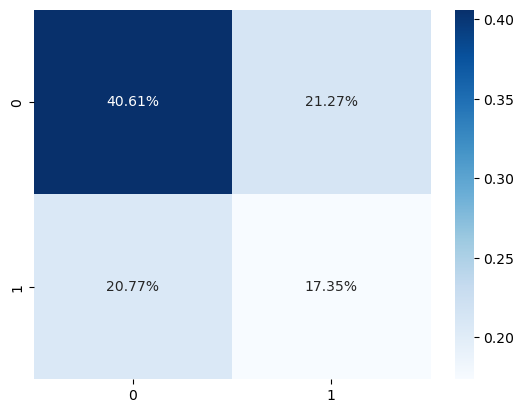

In [45]:
cf_matrix = confusion_matrix(y_val,y_pred_dt)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print('Classification Report for Decision Tree Classifier Model \n', classification_report(y_val,y_pred_dt))

In [46]:
#train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)
clf = clf.fit(X_train_SMOTE_std, y_train_SMOTE)
y_pred_rf = clf.predict(X_val_std)
print('Accuracy of Random Forest Classifier on test set: {:.2f}'.format(clf.score(X_val_std, y_val)))

Accuracy of Random Forest Classifier on test set: 0.63


Classification Report for the Random Forest Classifier Model
               precision    recall  f1-score   support

           0       0.69      0.76      0.72     86354
           1       0.52      0.44      0.48     53199

    accuracy                           0.63    139553
   macro avg       0.61      0.60      0.60    139553
weighted avg       0.62      0.63      0.63    139553



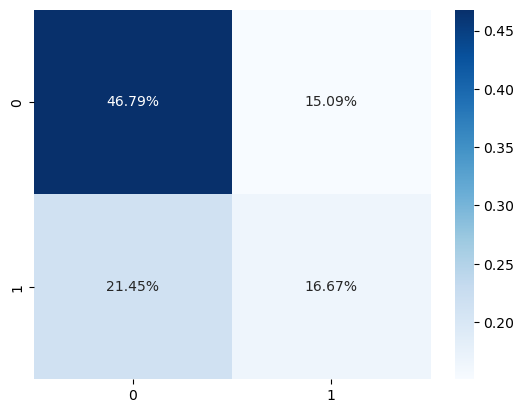

In [47]:
cf_matrix = confusion_matrix(y_val,y_pred_rf)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print('Classification Report for the Random Forest Classifier Model\n', classification_report(y_val,y_pred_rf))

In [48]:
#train KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_SMOTE_std, y_train_SMOTE)
y_pred_knn = knn.predict(X_val_std)
print('Accuracy of KNN Classifier on test set: {:.2f}'.format(knn.score(X_val_std, y_val)))

Accuracy of KNN Classifier on test set: 0.62


Classification Report for the K-Nearest Neighbors Model
               precision    recall  f1-score   support

           0       0.70      0.67      0.68     86354
           1       0.50      0.53      0.51     53199

    accuracy                           0.62    139553
   macro avg       0.60      0.60      0.60    139553
weighted avg       0.62      0.62      0.62    139553



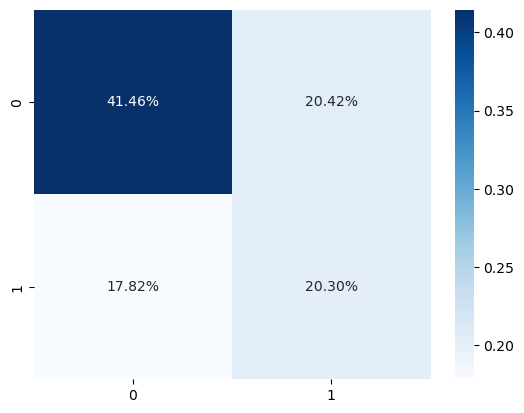

In [49]:
cf_matrix = confusion_matrix(y_val,y_pred_knn)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print('Classification Report for the K-Nearest Neighbors Model\n', classification_report(y_val,y_pred_knn))

In [50]:
#train Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_SMOTE_std, y_train_SMOTE)
y_pred_nb = model.predict(X_val_std)
print('Accuracy of Naive Bayes Classifier on test set: {:.2f}'.format(model.score(X_val_std, y_val)))

Accuracy of Naive Bayes Classifier on test set: 0.62


Classification Report for the Naive Bayes Model
               precision    recall  f1-score   support

           0       0.64      0.91      0.75     86354
           1       0.51      0.15      0.23     53199

    accuracy                           0.62    139553
   macro avg       0.57      0.53      0.49    139553
weighted avg       0.59      0.62      0.55    139553



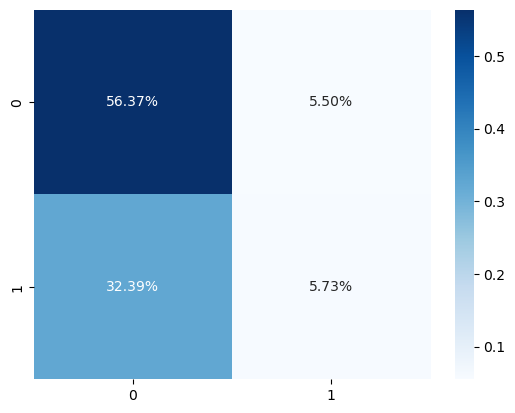

In [51]:
cf_matrix = confusion_matrix(y_val,y_pred_nb)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
print('Classification Report for the Naive Bayes Model\n', classification_report(y_val,y_pred_nb))

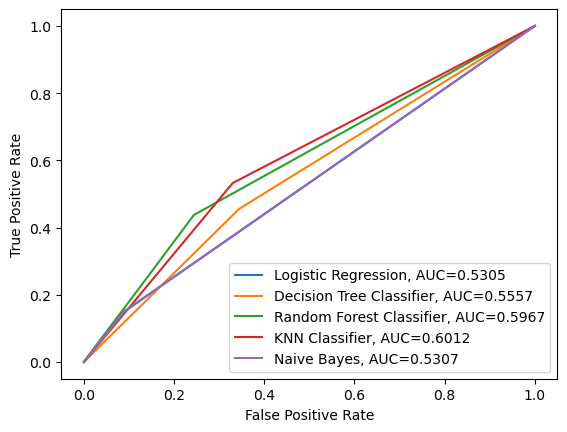

In [52]:
#Plot AUC for each of the Models
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_lr)
auc = round(metrics.roc_auc_score(y_val, y_pred_lr), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_dt)
auc = round(metrics.roc_auc_score(y_val, y_pred_dt), 4)
plt.plot(fpr,tpr,label="Decision Tree Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_rf)
auc = round(metrics.roc_auc_score(y_val, y_pred_rf), 4)
plt.plot(fpr,tpr,label="Random Forest Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_knn)
auc = round(metrics.roc_auc_score(y_val, y_pred_knn), 4)
plt.plot(fpr,tpr,label="KNN Classifier, AUC="+str(auc))

fpr, tpr, _ = metrics.roc_curve(y_val, y_pred_nb)
auc = round(metrics.roc_auc_score(y_val, y_pred_nb), 4)
plt.plot(fpr,tpr,label="Naive Bayes, AUC="+str(auc))

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()